In [ ]:
file = "Life Expectancy.csv"

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize': (20,20)})
sns.set_style('whitegrid')
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_squared_error as rmse
import numpy as np

In [ ]:
df = pd.read_csv(file)
df.shape

(2938, 22)

In [ ]:
df.head(50)

Country  Year  ... Income composition of resources  Schooling
0   Afghanistan  2015  ...                           0.479       10.1
1   Afghanistan  2014  ...                           0.476       10.0
2   Afghanistan  2013  ...                           0.470        9.9
3   Afghanistan  2012  ...                           0.463        9.8
4   Afghanistan  2011  ...                           0.454        9.5
5   Afghanistan  2010  ...                           0.448        9.2
6   Afghanistan  2009  ...                           0.434        8.9
7   Afghanistan  2008  ...                           0.433        8.7
8   Afghanistan  2007  ...                           0.415        8.4
9   Afghanistan  2006  ...                           0.405        8.1
10  Afghanistan  2005  ...                           0.396        7.9
11  Afghanistan  2004  ...                           0.381        6.8
12  Afghanistan  2003  ...                           0.373        6.5
13  Afghanistan  2002  ...                           0.341        6.2
14  Afghanistan  2001  ...                           0.340        5.9
15  Afghanistan  2000  ...                           0.338        5.5
16      Albania  2015  ...                           0.762       14.2
17      Albania  2014  ...                           0.761       14.2
18      Albania  2013  ...                           0.759       14.2
19      Albania  2012  ...                           0.752       14.2
20      Albania  2011  ...                           0.738       13.3
21      Albania  2010  ...                           0.725       12.5
22      Albania  2009  ...                           0.721       12.2
23      Albania  2008  ...                           0.713       12.0
24      Albania  2007  ...                           0.703       11.6
25      Albania  2006  ...                           0.696       11.4
26      Albania  2005  ...                           0.685       10.8
27      Albania  2004  ...                           0.681       10.9
28      Albania  2003  ...                           0.674       10.7
29      Albania  2002  ...                           0.670       10.7
30      Albania  2001  ...                           0.662       10.6
31      Albania  2000  ...                           0.656       10.7
32      Algeria  2015  ...                           0.743       14.4
33      Algeria  2014  ...                           0.741       14.4
34      Algeria  2013  ...                           0.737       14.4
35      Algeria  2012  ...                           0.732       14.4
36      Algeria  2011  ...                           0.724       14.0
37      Algeria  2010  ...                           0.714       13.6
38      Algeria  2009  ...                           0.705       13.1
39      Algeria  2008  ...                           0.697       12.6
40      Algeria  2007  ...                           0.690       12.3
41      Algeria  2006  ...                           0.686       12.3
42      Algeria  2005  ...                           0.680       12.0
43      Algeria  2004  ...                           0.673       11.7
44      Algeria  2003  ...                           0.663       11.5
45      Algeria  2002  ...                           0.653       11.1
46      Algeria  2001  ...                           0.644       10.9
47      Algeria  2000  ...                           0.636       10.7
48       Angola  2015  ...                           0.531       11.4
49       Angola  2014  ...                           0.527       11.4

[50 rows x 22 columns]

In [ ]:
df = df.dropna()
df.shape

(1649, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   float64
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   float64
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   int64  
 12  Polio               

In [ ]:
df.describe(include = "all")

Country         Year  ... Income composition of resources    Schooling
count          1649  1649.000000  ...                     1649.000000  1649.000000
unique          133          NaN  ...                             NaN          NaN
top     Afghanistan          NaN  ...                             NaN          NaN
freq             16          NaN  ...                             NaN          NaN
mean            NaN  2007.840509  ...                        0.631551    12.119891
std             NaN     4.087711  ...                        0.183089     2.795388
min             NaN  2000.000000  ...                        0.000000     4.200000
25%             NaN  2005.000000  ...                        0.509000    10.300000
50%             NaN  2008.000000  ...                        0.673000    12.300000
75%             NaN  2011.000000  ...                        0.751000    14.000000
max             NaN  2015.000000  ...                        0.936000    20.700000

[11 rows x 22 columns]

In [ ]:
cat = ['Country', 'Status']

In [ ]:
for column in cat:
  print(column, ":", df[column].unique(),'\n')

print(df.shape)

Country : ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belarus' 'Belgium'
 'Belize' 'Benin' 'Bhutan' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon'
 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Costa Rica' 'Croatia' 'Cyprus' 'Djibouti' 'Dominican Republic'
 'Ecuador' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Ethiopia' 'Fiji' 'France' 'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'Honduras' 'India'
 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Jordan'
 'Kazakhstan' 'Kenya' 'Kiribati' 'Latvia' 'Lebanon' 'Lesotho' 'Liberia'
 'Lithuania' 'Luxembourg' 'Madagascar' 'Malawi' 'Malaysia' 'Maldives'
 'Mali' 'Malta' 'Mauritania' 'Mauritius' 'Mexico' 'Mongolia' 'Montenegro'
 'Morocco' 'Mozambique' 'Myanmar' 'Namibia' 'Nepal' 'Netherlands'
 'Nic

In [ ]:
#df = df.drop(['Country'], axis=1)
#df

In [ ]:
pip install pycountry_convert

In [ ]:
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)

    if country_alpha2 == "TL":
      country_continent_code = "AS"
    else:
      country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name

df['Country']=df['Country'].apply(country_to_continent)
df

#https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
# TL = Timor Leste(in Asia). The package cannot recognize TL, so we code it manually.

Country  Year  ... Income composition of resources  Schooling
0       Asia  2015  ...                           0.479       10.1
1       Asia  2014  ...                           0.476       10.0
2       Asia  2013  ...                           0.470        9.9
3       Asia  2012  ...                           0.463        9.8
4       Asia  2011  ...                           0.454        9.5
...      ...   ...  ...                             ...        ...
2933  Africa  2004  ...                           0.407        9.2
2934  Africa  2003  ...                           0.418        9.5
2935  Africa  2002  ...                           0.427       10.0
2936  Africa  2001  ...                           0.427        9.8
2937  Africa  2000  ...                           0.434        9.8

[1649 rows x 22 columns]

In [ ]:
country_dummies = pd.get_dummies(df['Country'])
df = df.drop(['Country'], axis=1).join(country_dummies)
df

Year      Status  Life expectancy   ...  North America  Oceania  South America
0     2015  Developing              65.0  ...              0        0              0
1     2014  Developing              59.9  ...              0        0              0
2     2013  Developing              59.9  ...              0        0              0
3     2012  Developing              59.5  ...              0        0              0
4     2011  Developing              59.2  ...              0        0              0
...    ...         ...               ...  ...            ...      ...            ...
2933  2004  Developing              44.3  ...              0        0              0
2934  2003  Developing              44.5  ...              0        0              0
2935  2002  Developing              44.8  ...              0        0              0
2936  2001  Developing              45.3  ...              0        0              0
2937  2000  Developing              46.0  ...              0        0              0

[1649 rows x 27 columns]

In [ ]:
df['Status'] = df['Status'].map({"Developing":0, "Developed":1})
df

Year  Status  Life expectancy   ...  North America  Oceania  South America
0     2015       0              65.0  ...              0        0              0
1     2014       0              59.9  ...              0        0              0
2     2013       0              59.9  ...              0        0              0
3     2012       0              59.5  ...              0        0              0
4     2011       0              59.2  ...              0        0              0
...    ...     ...               ...  ...            ...      ...            ...
2933  2004       0              44.3  ...              0        0              0
2934  2003       0              44.5  ...              0        0              0
2935  2002       0              44.8  ...              0        0              0
2936  2001       0              45.3  ...              0        0              0
2937  2000       0              46.0  ...              0        0              0

[1649 rows x 27 columns]

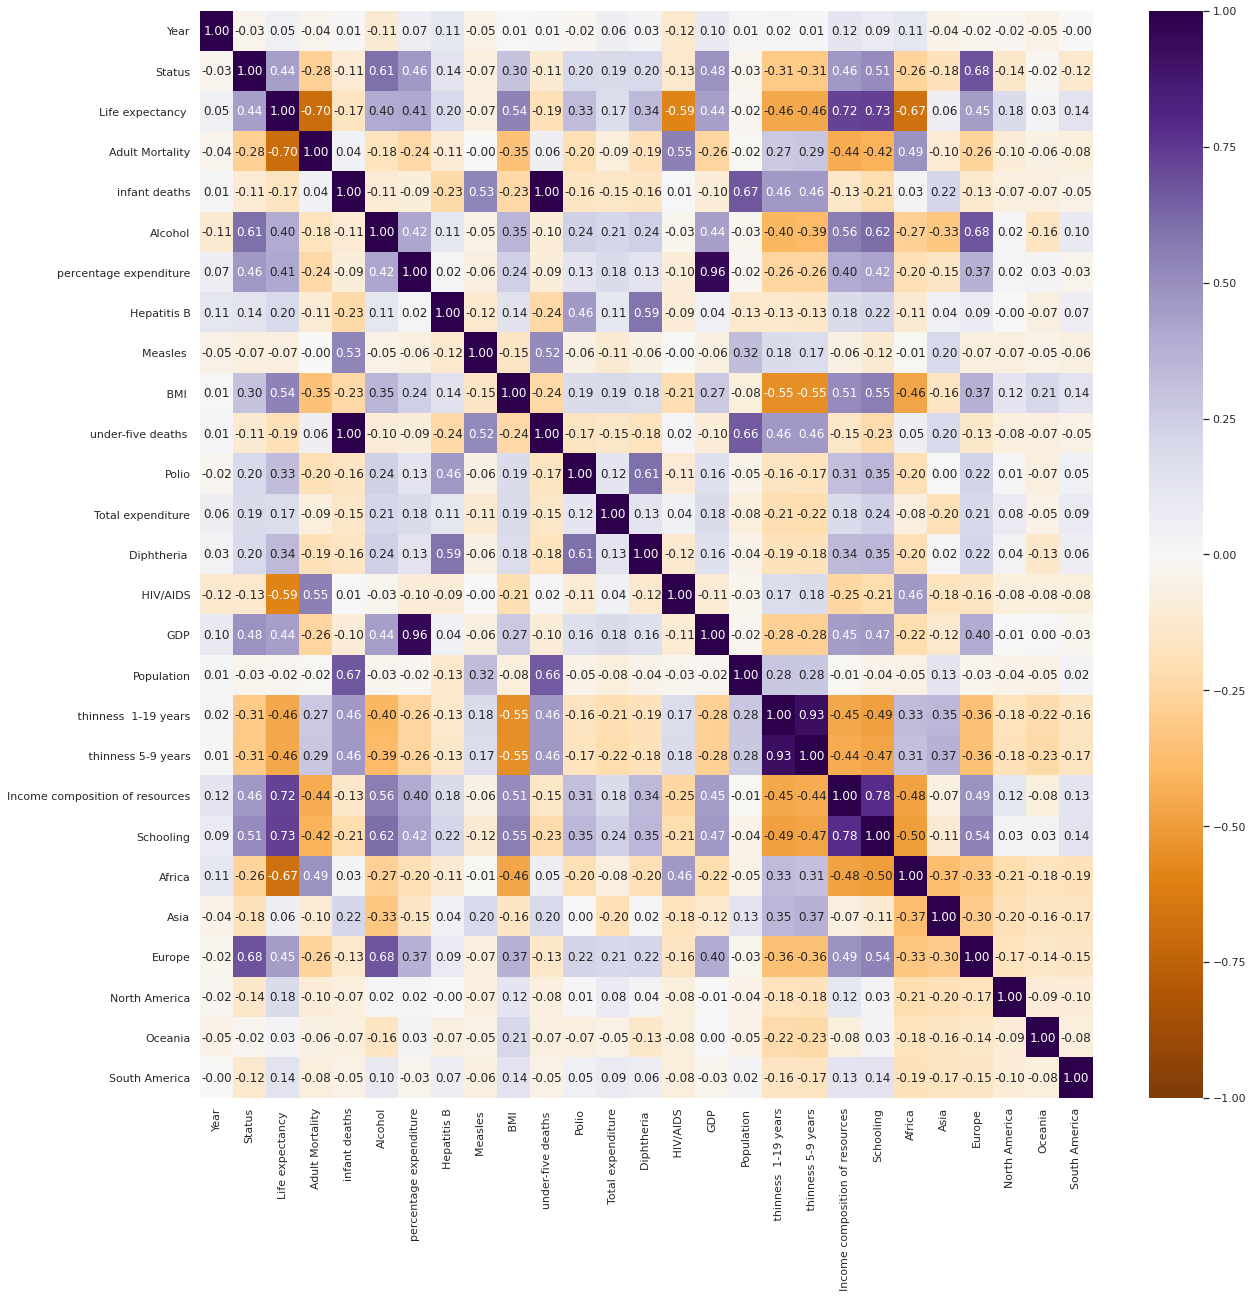

In [ ]:
corr_matrix = df.corr('pearson')
#sns.heatmap(corr_matrix)
sns.heatmap(corr_matrix, cmap = 'PuOr', fmt='.2f', annot=True, vmin=-1, vmax=1, center=0) #PuOR purple orange

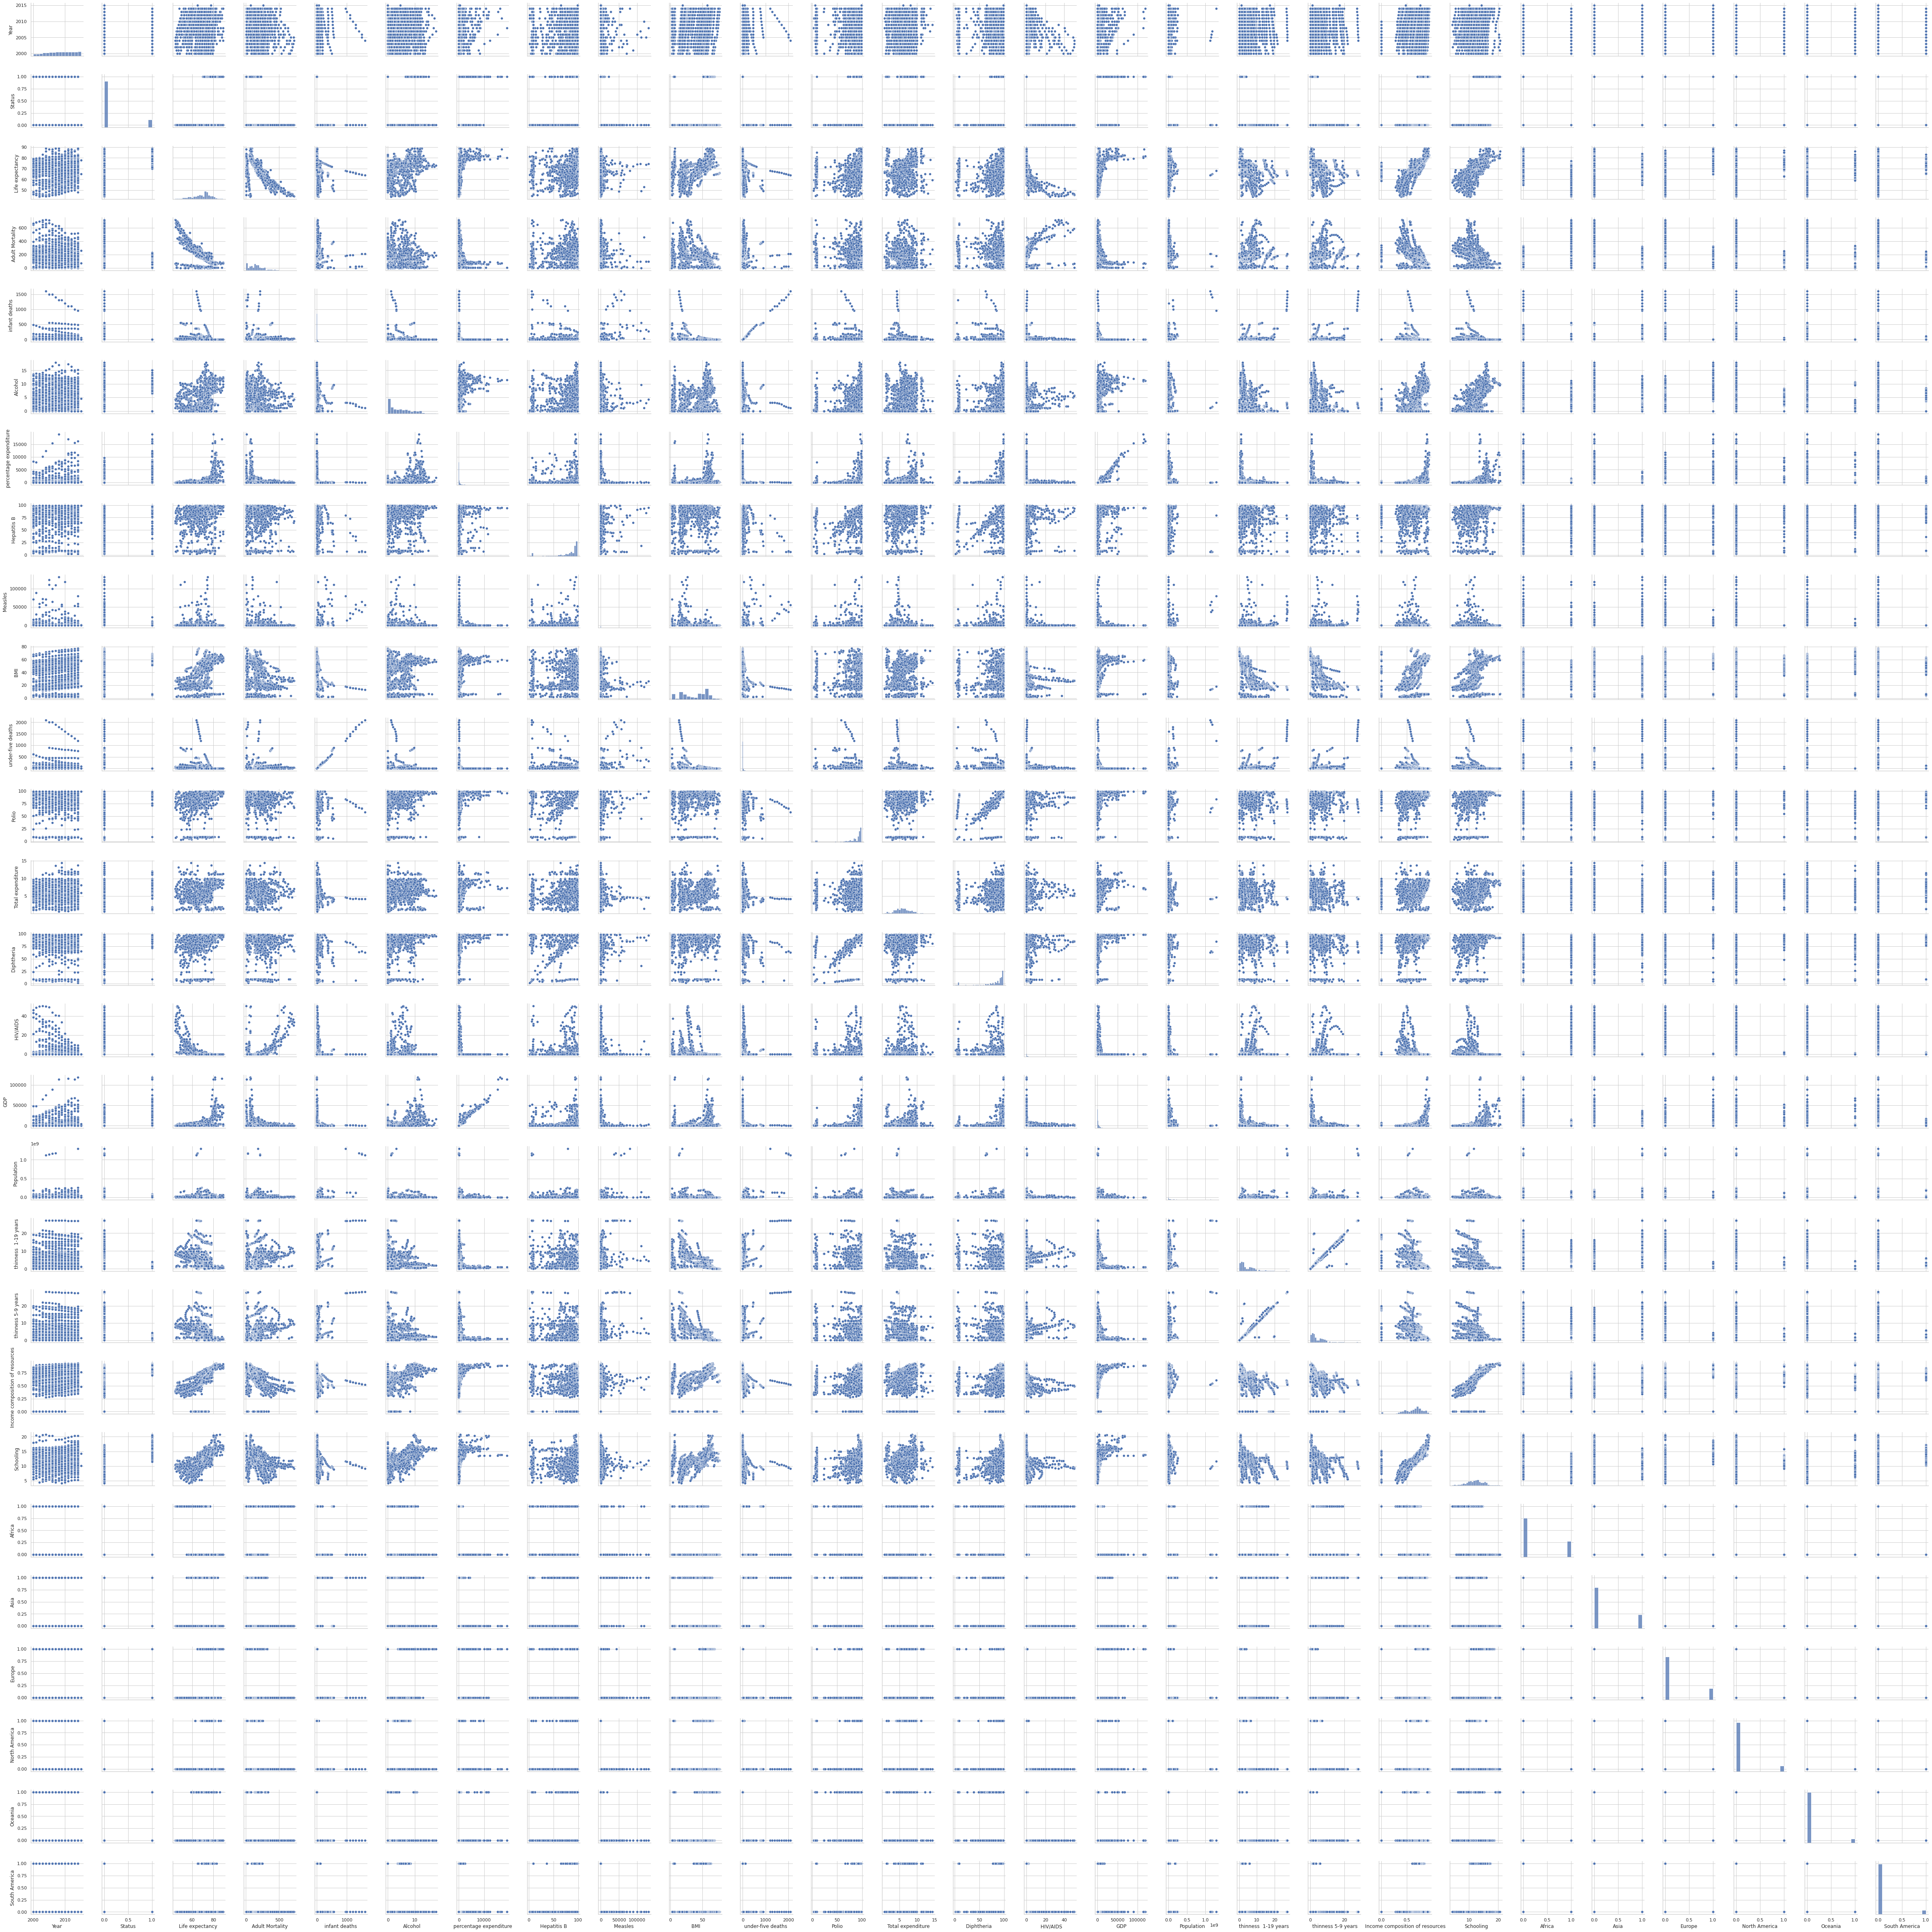

In [ ]:
sns.pairplot(df)

We choose Schooling as the independent variable for the simple linear regression model because it has the highest correlation among all the variables. Besides that, higher education levels is going to improved the longevity or life expectancy, according to Hall and Peterson (Kristen Beckman, 2016).

Reference:
Beckman, K. 2016. Factors That Affect Longevity. Available at: https://www.thinkadvisor.com/2016/05/27/9-factors-that-affect-longevity/ [Accessed on: 12 September 2021]

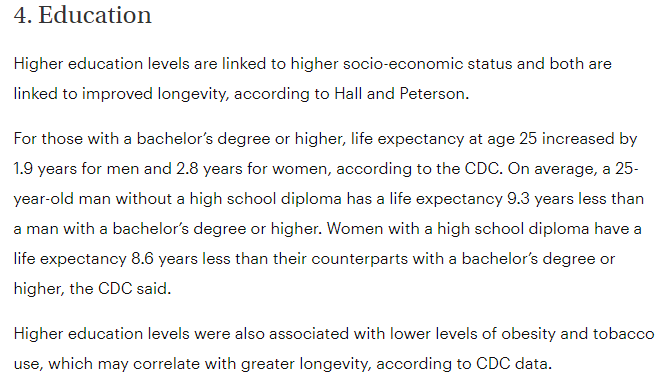

In [ ]:
y = df['Life expectancy '].values
X = df['Schooling'].values


X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

model = LR()
model.fit(X, y)

y_pred = model.predict(X)

print(f"RMSE = {rmse(y_pred,y)}")
print(f"R2 = {model.score(X, y)}")
print(f"R2 Adjusted = {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Intercept = {model.intercept_}")
print(f"Coefficients = {model.coef_}")

RMSE = 36.39144686879598
R2 = 0.5294454639356108
R2 Adjusted = 0.5291597599064277
Intercept = [41.55034175]
Coefficients = [[2.28978652]]


For model 2, we choose X1 = Schooling, X2 = HIV/AIDS, X3 = Adult Mortality, X4 = Africa as independent variables as these variables are highly correlated to the Life expectancy. 

For model 3, we choose X1 = Income composition of resources, X2 = HIV/AIDS, X3 = Adult Mortality, X4 = Africa as independent variables as these variables are highly correlated to the Life expectancy. We change the X1 to Income composition of resources as the correlation with Life expectancy is nearly the same with the Schooling. So, we decide to build these two models.

In [ ]:
X = df[['Schooling', ' HIV/AIDS', 'Adult Mortality', 'Africa']]
y = df['Life expectancy ']

model = LR()
model.fit(X, y)

y_pred = model.predict(X)

print(f"RMSE = {rmse(y_pred,y)}")
print(f"R2 = {model.score(X, y)}")
print(f"R2 Adjusted = {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Intercept = {model.intercept_}")
print(f"Coefficients = {model.coef_}")

RMSE = 14.736108876228013
R2 = 0.8094567962453421
R2 Adjusted = 0.8089931874770826
Intercept = 56.72607591515697
Coefficients = [ 1.45404673 -0.37093539 -0.0192254  -3.75388216]


In [ ]:
X = df[['Income composition of resources', ' HIV/AIDS', 'Adult Mortality', 'Africa']]
y = df['Life expectancy ']

model = LR()
model.fit(X, y)

y_pred = model.predict(X)

print(f"RMSE = {rmse(y_pred,y)}")
print(f"R2 = {model.score(X, y)}")
print(f"R2 Adjusted = {1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)}")
print(f"Intercept = {model.intercept_}")
print(f"Coefficients = {model.coef_}")

RMSE = 15.87396814612649
R2 = 0.7947438654079385
R2 Adjusted = 0.7942444587544298
Intercept = 61.28939277269648
Coefficients = [ 2.08678715e+01 -3.32293881e-01 -1.91988735e-02 -4.45351011e+00]


For this three models, model 2 is the most appropriate model as the adjusted R squared is the highest among the model we compared. Hence, we use model 2 for further prediction in Q4.

In [ ]:
#export preprocessed data to find Confidence Interval with R-Programming
from google.colab import files
df.to_csv('Life Expectancy(new).csv', index=False) 
files.download('Life Expectancy(new).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Below are R-Programming code, please don't run it here.

In [ ]:
# R-Programming code
df <- read.csv('C:/Users/ASUS/Desktop/MSS/Life Expectancy(new).csv')

#Best model
Y <- df$Life.expectancy
X1 <- df$Schooling
X2 <- df$HIV.AIDS
X3 <- df$Adult.Mortality
X4 <- df$Africa

model <- lm(Y ~ X1 + X2 + X3 +X4)
model
summary(model)

The model output is exactly same with model 2.

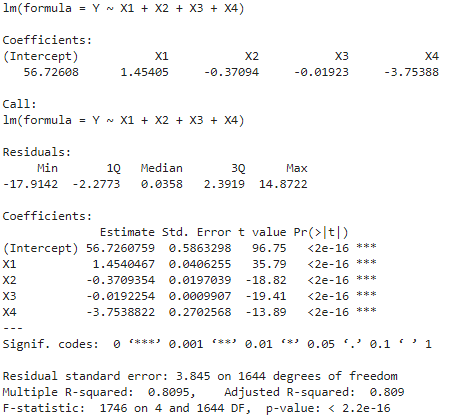

Now we find the confidence interval for X1 =10, X2 = 0.1, X3 = 263 and X4 = 1.

In [ ]:
#R programming code
test <- data.frame(X1 =10, X2 = 0.1, X3 = 263, X4 = 1)
predict.lm(model, newdata = test)

predict.lm(model, newdata = test, interval = "confidence", level = 0.95)

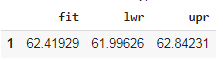

The output shows that the 95% CI for the E(Y) when X1 = 10, X2 = 0.1, X3 = 263 and X4 = 1 is [61.99626, 62.84231].